Title: Supervised Learning 

In [2]:
import pandas as pd

# Create a sample dataset
data = {
    'size': [1500, 1600, 1700, 1800, 1900],
    'bedrooms': [3, 3, 4, 4, 5],
    'bathrooms': [2, 2, 2, 3, 3],
    'price': [300000, 320000, 340000, 360000, 380000]
}

df = pd.DataFrame(data)

# Define input (X) and output (y)
X = df[['size', 'bedrooms', 'bathrooms']]
y = df['price']

# Display input and output
print("Input Features (X):")
print(X)

print("\nOutput Variable (y):")
print(y)


Input Features (X):
   size  bedrooms  bathrooms
0  1500         3          2
1  1600         3          2
2  1700         4          2
3  1800         4          3
4  1900         5          3

Output Variable (y):
0    300000
1    320000
2    340000
3    360000
4    380000
Name: price, dtype: int64


Task 2: Match labeled images to their correct classifications.

<Figure size 640x480 with 0 Axes>

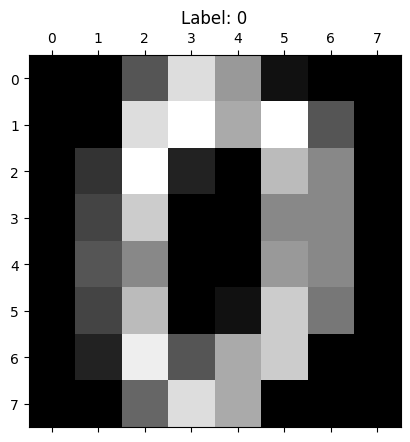

Classification Accuracy: 0.97


In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load labeled dataset of images
digits = load_digits()
X = digits.data  # Flattened image pixels
y = digits.target  # Labels (0 to 9)

# Visualize the first image and its label
plt.gray()
plt.matshow(digits.images[0])
plt.title(f"Label: {digits.target[0]}")
plt.show()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict labels for test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.2f}")


Task 3: List potential inputs and outputs for predicting stock prices.

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.9/320.9 kB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 39.1 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.3/187.3 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.2/446.2 kB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

[*********************100%***********************]  1 of 1 completed

Mean Squared Error: 263.34


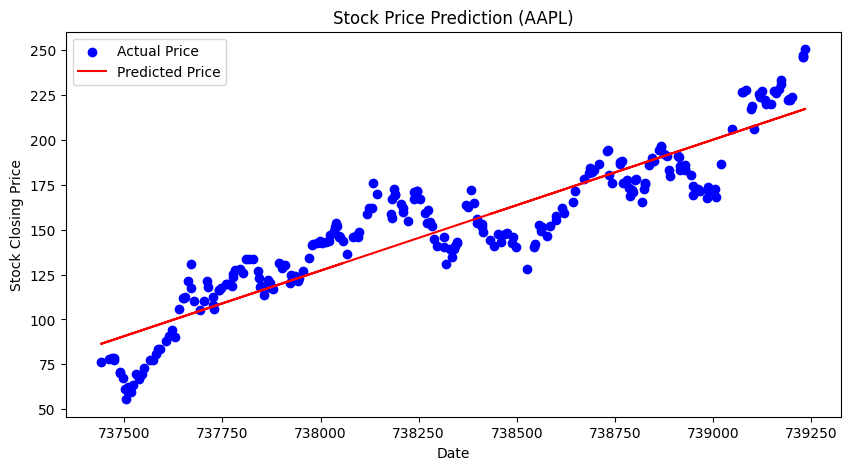

In [6]:
%pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Download stock data (e.g., Apple)
stock_data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")

# Reset index to make 'Date' a column
stock_data.reset_index(inplace=True)

# Use the date as a numerical feature
stock_data['Date_ordinal'] = pd.to_datetime(stock_data['Date']).map(pd.Timestamp.toordinal)

# Define input (X) and output (y)
X = stock_data[['Date_ordinal']]
y = stock_data['Close']  # Predicting closing price

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred, color='red', label='Predicted Price')
plt.xlabel("Date")
plt.ylabel("Stock Closing Price")
plt.title("Stock Price Prediction (AAPL)")
plt.legend()
plt.show()
